In [136]:
#Use decision trees to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#Data Description :

#Undergrad : person is under graduated or not
#Marital.Status : marital status of a person
#Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
#Work Experience : Work experience of an individual person
#Urban : Whether that person belongs to urban area or not 

In [137]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt  

In [138]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from matplotlib import gridspec

In [139]:
credit = pd.read_csv("D:/DataScience/regression/DT/Fraud_check.csv")

In [140]:
credit.shape

(600, 6)

In [141]:
credit.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [142]:
credit.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [143]:
credit.count()

Undergrad          600
Marital.Status     600
Taxable.Income     600
City.Population    600
Work.Experience    600
Urban              600
dtype: int64

In [144]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [145]:
Undergrad_set = set(credit['Undergrad'])
print(Undergrad_set)

{'YES', 'NO'}


In [146]:
credit['Undergrad'] = credit['Undergrad'].map({'YES': 0, 'NO': 1}).astype(int)

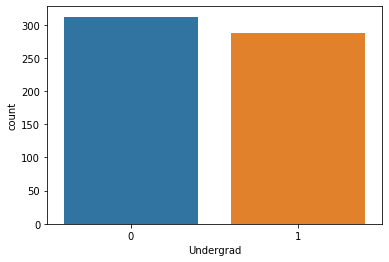

In [147]:
credit.Undergrad.value_counts()
sb.countplot(credit.Undergrad)

In [162]:
Urban_set = set(credit['Urban'])
print(Urban_set)

{'YES', 'NO'}


In [163]:
credit['Urban'] = credit['Urban'].map({'YES':1, 'NO': 0}).astype(int)

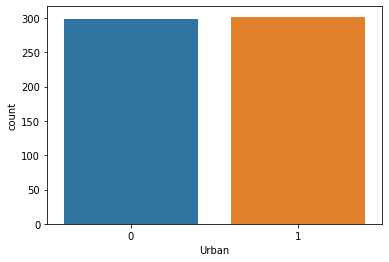

In [164]:
credit.Urban.value_counts()
sb.countplot(credit.Urban)

In [149]:
credit.rename(columns={'Marital.Status': 'MaritalStatus', 'Taxable.Income': 'TaxableIncome', 'City.Population': 'CityPopulation', 'Work.Experience': 'WorkExperience'}, inplace=True)

In [150]:
credit.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,1,Single,68833,50047,10,YES
1,0,Divorced,33700,134075,18,YES
2,1,Married,36925,160205,30,YES
3,0,Single,50190,193264,15,YES
4,1,Married,81002,27533,28,NO


In [151]:
MaritalStatus_set = set(credit['MaritalStatus'])
print(MaritalStatus_set)

{'Divorced', 'Single', 'Married'}


In [152]:
credit['MaritalStatus'] = credit['MaritalStatus'].map({'Single': 0, 'Divorced': 1, 'Married':2}).astype(int)

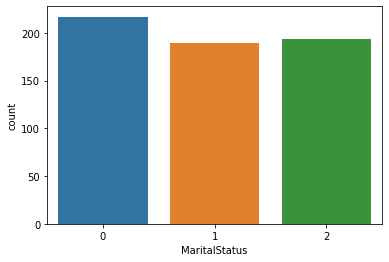

In [153]:
credit.MaritalStatus.value_counts()
sb.countplot(credit.MaritalStatus)

In [154]:
# TaxableIncome_set = set(credit['TaxableIncome'])
# print(TaxableIncome_set)

In [190]:
#credit['TaxableIncome'] = credit['TaxableIncome'].map({' <=30000': 0, ' >30000': 1}).astype(int)

In [215]:
tmp = pd.DataFrame({"TA":np.array(credit["TaxableIncome"] > 30000)})
credit =  credit.join(tmp)
credit.head(20)

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,TA
0,1,0,68833,50047,10,1,True
1,0,1,33700,134075,18,1,True
2,1,2,36925,160205,30,1,True
3,0,0,50190,193264,15,1,True
4,1,2,81002,27533,28,0,True
5,1,1,33329,116382,0,0,True
6,1,1,83357,80890,8,1,True
7,0,0,62774,131253,3,1,True
8,1,0,83519,102481,12,1,True
9,0,1,98152,155482,4,1,True


In [216]:
TA_set = set(credit['TA'])
print(TA_set)

{False, True}


In [217]:
#Risky = credit[credit['TaxableIncome'] == 1]
#good = credit[credit['TaxableIncome'] == 0]

In [220]:
credit['TA'] = credit['TA'].map({False: 0, True: 1}).astype(int)

In [221]:
credit.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,TA
0,1,0,68833,50047,10,1,1
1,0,1,33700,134075,18,1,1
2,1,2,36925,160205,30,1,1
3,0,0,50190,193264,15,1,1
4,1,2,81002,27533,28,0,1


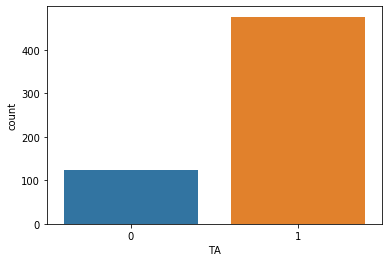

In [222]:
credit.TA.value_counts()
sb.countplot(credit.TA)

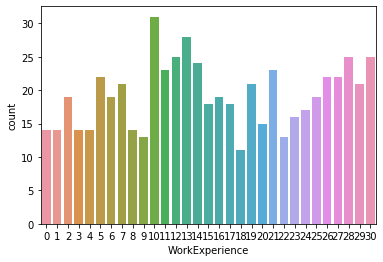

In [157]:
credit.WorkExperience.value_counts()
sb.countplot(credit.WorkExperience)

In [223]:
credit.corr().TA.sort_values(ascending=False)

TA                1.000000
TaxableIncome     0.688725
Undergrad         0.012523
WorkExperience    0.001972
Urban            -0.004830
CityPopulation   -0.012225
MaritalStatus    -0.033622
Name: TA, dtype: float64

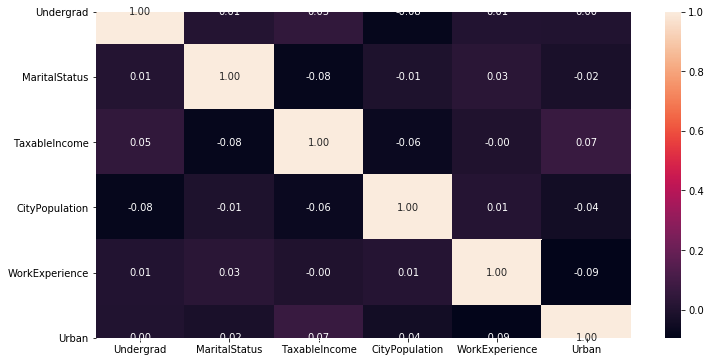

In [167]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sb.heatmap(credit.corr(), annot=True, fmt='.2f')

In [224]:
from sklearn.model_selection import train_test_split

X = credit.drop(columns=['TA'], axis=1)

y = credit['TA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [225]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [226]:
pred = model.predict(X_test)
pd.Series(pred).value_counts()
pd.crosstab(y_test,pred)

col_0,0,1
TA,,
0,43,0
1,0,137


In [229]:
y_predict = model.predict(X_test)

In [230]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual': y_test,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

,Actual,Prediction
598,1,1
426,1,1
34,0,0
438,0,0
358,1,1
313,1,1
50,1,1
231,1,1
591,0,0
320,1,1


In [231]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       137

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [239]:
type(pred)

numpy.ndarray

In [246]:
#accuracy

In [247]:
from sklearn import tree

[Text(167.4, 163.07999999999998, 'X[2] <= 30041.5\nentropy = 0.707\nsamples = 420\nvalue = [81, 339]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 81\nvalue = [81, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 339\nvalue = [0, 339]')]

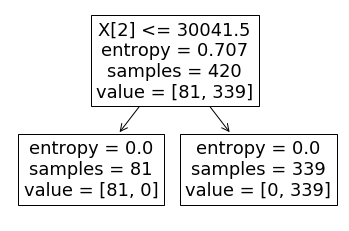

In [248]:
tree.plot_tree(model) 

In [250]:
#regressor model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

In [251]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

In [252]:
X = credit.drop(columns=['TA'], axis=1)

y = credit['TA']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [256]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [257]:
y_trpred = regressor.predict(X_train)

In [258]:
tr_rmse = np.sqrt(np.mean((y_train - y_trpred) ** 2))
tr_rmse

0.0

In [259]:
y_pred=regressor.predict(X_test)

In [260]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
rmse

0.0